In [1315]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [1316]:
data=pd.read_csv(r'C:\Users\ADMIN\OneDrive\Desktop\ICT PROJECT WORK\CREDIT CARD LEAD PREDICTION\train.csv')

In [1317]:
data

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
...,...,...,...,...,...,...,...,...,...,...,...
245720,BPAWWXZN,Male,51,RG284,Self_Employed,X3,109,NaN,1925586,No,0
245721,HFNB7JY8,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0
245722,GEHAUCWT,Female,26,RG281,Salaried,X1,13,No,670659,No,0
245723,GE7V8SAH,Female,28,RG273,Salaried,X1,31,No,407504,No,0


In [1318]:
data=data.drop('ID',axis=1)

In [1319]:
#FINDING AND HANDLING MISSING VALUES 

In [1320]:
data.isna().sum()

Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [1321]:
# Assuming 'data' is the DataFrame that contains the data

# Filter the rows where 'Lead' is equal to 1
lead_1_data = data[data['Is_Lead'] == 1]

# Get the value counts of 'Credit_Product' in the filtered data
credit_product_counts = lead_1_data['Credit_Product'].value_counts()

print(credit_product_counts)

Yes    22690
No     10623
Name: Credit_Product, dtype: int64


In [1322]:
lead_1_data['Credit_Product'].isna().sum()

24975

In [1323]:
# Assuming 'data' is the DataFrame that contains the data

# Filter the rows where 'Lead' is equal to 0
lead_0_data = data[data['Is_Lead'] == 0]

# Get the value counts of 'Credit_Product' in the filtered data
credit_product_counts = lead_0_data['Credit_Product'].value_counts()

print(credit_product_counts)

No     133734
Yes     49353
Name: Credit_Product, dtype: int64


In [1324]:
lead_0_data['Credit_Product'].isna().sum()

4350

In [1325]:
# Assuming 'data' is the DataFrame that contains both  lead_1_data and lead_0_data

# Fill missing values in 'Credit_Product' column with 'Yes' where Lead is 1
data.loc[data['Is_Lead']==1,'Credit_Product']=data.loc[data['Is_Lead'] == 1, 'Credit_Product'].fillna('Yes')

# Fill missing values in 'Credit_Product' column with 'No' where Lead is 0
data.loc[data['Is_Lead']==0,'Credit_Product']=data.loc[data['Is_Lead'] == 0, 'Credit_Product'].fillna('No')


In [1326]:
data.isna().sum()

Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

In [1327]:
data['Credit_Product'].value_counts()

No     148707
Yes     97018
Name: Credit_Product, dtype: int64

In [1328]:
#Detection of Outliers:

Text(0.5, 1.0, 'Box plot of Avg_Account_Balance')

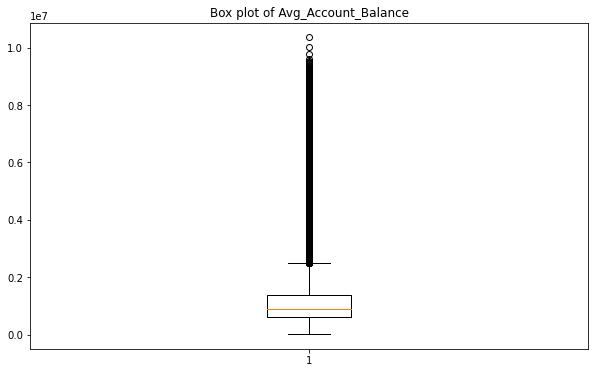

In [1329]:
# avg account balance:
plt.boxplot(data['Avg_Account_Balance'])
plt.title('Box plot of Avg_Account_Balance')

In [1330]:
q1 = np.percentile(data['Avg_Account_Balance'], 25)
q2 = np.percentile(data['Avg_Account_Balance'], 50)
q3 = np.percentile(data['Avg_Account_Balance'], 75)

In [1331]:
iqr=q3-q1

In [1332]:
low_limit = q1 - 1.5*iqr
upr_limit = q3 + 1.5*iqr

In [1333]:
low_limit

-539224.0

In [1334]:
upr_limit

2510200.0

In [1335]:
outlier=[]
for x in data['Avg_Account_Balance']:
    if x>upr_limit or x<low_limit:
        outlier.append(x)

In [1336]:
outlier

[2521592,
 2824468,
 6278683,
 5878049,
 2952343,
 5950700,
 2601656,
 3949713,
 3123134,
 2729727,
 2555270,
 3850567,
 2944493,
 2933466,
 3831583,
 3540669,
 2561687,
 2872448,
 3800193,
 3051160,
 3278386,
 4125595,
 3005209,
 7880380,
 3195126,
 2768985,
 3449426,
 3646543,
 5857499,
 5182372,
 3969266,
 5273143,
 2983564,
 5752728,
 2772937,
 2938246,
 2544189,
 2790799,
 3768268,
 3929741,
 3287900,
 2919013,
 6588376,
 2563600,
 2826195,
 4067059,
 2741226,
 5420269,
 3459082,
 3879456,
 3578868,
 6722899,
 2662399,
 2845178,
 3407498,
 8256124,
 3441282,
 2612888,
 2777885,
 2772252,
 3413399,
 3798066,
 2618664,
 4425329,
 2756970,
 4419980,
 4793246,
 3148143,
 3116121,
 2862943,
 2602546,
 3440188,
 2727333,
 5026275,
 4948862,
 4818620,
 4210198,
 4022185,
 2818256,
 2857985,
 3649275,
 2708741,
 2720703,
 3907100,
 2730991,
 4597535,
 2689143,
 2629086,
 3820574,
 3296827,
 3033440,
 3940715,
 2574218,
 2696486,
 7414269,
 2948374,
 2724405,
 2934668,
 4433597,
 2984988,


In [1337]:
ind1 = data['Avg_Account_Balance']>upr_limit
ind2= data['Avg_Account_Balance']<low_limit

In [1338]:
data.loc[ind1].index

Int64Index([    35,     71,    113,    184,    205,    211,    214,    218,
               240,    262,
            ...
            245554, 245560, 245601, 245610, 245629, 245638, 245653, 245661,
            245676, 245701],
           dtype='int64', length=14612)

In [1339]:
data.loc[ind2].index #no low outliers

Int64Index([], dtype='int64')

In [1340]:
data[ind1]['Avg_Account_Balance']

35        2521592
71        2824468
113       6278683
184       5878049
205       2952343
           ...   
245638    5396737
245653    6900312
245661    3566719
245676    2769973
245701    9491986
Name: Avg_Account_Balance, Length: 14612, dtype: int64

In [1341]:
#ENCODING 

In [1342]:
data['Region_Code'] = data['Region_Code'].str.replace('RG', '').astype(int)
data['Channel_Code'] = data['Channel_Code'].str.replace('X', '').astype(int)

In [1343]:
data

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,Female,73,268,Other,3,43,No,1045696,No,0
1,Female,30,277,Salaried,1,32,No,581988,No,0
2,Female,56,268,Self_Employed,3,26,No,1484315,Yes,0
3,Male,34,270,Salaried,1,19,No,470454,No,0
4,Female,30,282,Salaried,1,33,No,886787,No,0
...,...,...,...,...,...,...,...,...,...,...
245720,Male,51,284,Self_Employed,3,109,No,1925586,No,0
245721,Male,27,268,Salaried,1,15,No,862952,Yes,0
245722,Female,26,281,Salaried,1,13,No,670659,No,0
245723,Female,28,273,Salaried,1,31,No,407504,No,0


In [1344]:
#ONE HOT ENCODING 

In [1345]:
from sklearn.preprocessing import OneHotEncoder

# Select the categorical columns to encode
categorical_columns = ['Gender', 'Occupation', 'Is_Active', 'Credit_Product']

# Create a OneHotEncoder instance
encoder = OneHotEncoder(drop='first', sparse=False)

# Fit and transform the encoder on the selected categorical columns
encoded_columns = encoder.fit_transform(data[categorical_columns])

# Create a DataFrame from the encoded_columns array with column names
encoded_data = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(categorical_columns))

# Drop the original categorical columns from 'data'
data.drop(categorical_columns, axis=1, inplace=True)

# Concatenate the original 'data' DataFrame with the encoded_data DataFrame
data = pd.concat([data, encoded_data], axis=1)

# Show the updated 'data' DataFrame
data

,Age,Region_Code,Channel_Code,Vintage,Avg_Account_Balance,Is_Lead,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Is_Active_Yes,Credit_Product_Yes
0,73,268,3,43,1045696,0,0.0,1.0,0.0,0.0,0.0,0.0
1,30,277,1,32,581988,0,0.0,0.0,1.0,0.0,0.0,0.0
2,56,268,3,26,1484315,0,0.0,0.0,0.0,1.0,1.0,0.0
3,34,270,1,19,470454,0,1.0,0.0,1.0,0.0,0.0,0.0
4,30,282,1,33,886787,0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
245720,51,284,3,109,1925586,0,1.0,0.0,0.0,1.0,0.0,0.0
245721,27,268,1,15,862952,0,1.0,0.0,1.0,0.0,1.0,0.0
245722,26,281,1,13,670659,0,0.0,0.0,1.0,0.0,0.0,0.0
245723,28,273,1,31,407504,0,0.0,0.0,1.0,0.0,0.0,0.0


In [1346]:
#HANDLING OUTLIERS 

In [1347]:
#dropping

In [1348]:

# Create a copy of the original DataFrame for dropping rows
dropping_data = data.copy()

# Define the condition to identify the rows you want to drop
condition = (dropping_data['Avg_Account_Balance'] > 2510200.0)

# Drop the rows that meet the specified condition
dropping_data.drop(dropping_data[condition].index, inplace=True)


In [1349]:
dropping_data

,Age,Region_Code,Channel_Code,Vintage,Avg_Account_Balance,Is_Lead,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Is_Active_Yes,Credit_Product_Yes
0,73,268,3,43,1045696,0,0.0,1.0,0.0,0.0,0.0,0.0
1,30,277,1,32,581988,0,0.0,0.0,1.0,0.0,0.0,0.0
2,56,268,3,26,1484315,0,0.0,0.0,0.0,1.0,1.0,0.0
3,34,270,1,19,470454,0,1.0,0.0,1.0,0.0,0.0,0.0
4,30,282,1,33,886787,0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
245720,51,284,3,109,1925586,0,1.0,0.0,0.0,1.0,0.0,0.0
245721,27,268,1,15,862952,0,1.0,0.0,1.0,0.0,1.0,0.0
245722,26,281,1,13,670659,0,0.0,0.0,1.0,0.0,0.0,0.0
245723,28,273,1,31,407504,0,0.0,0.0,1.0,0.0,0.0,0.0


In [1350]:
dropping_data['Avg_Account_Balance'].max()

2509800

In [1351]:
plt.rcParams['figure.figsize'] = (10, 6)  # Set the default figure size (width, height) in inches


Text(0.5, 1.0, 'Box plot of Avg_Account_Balance')

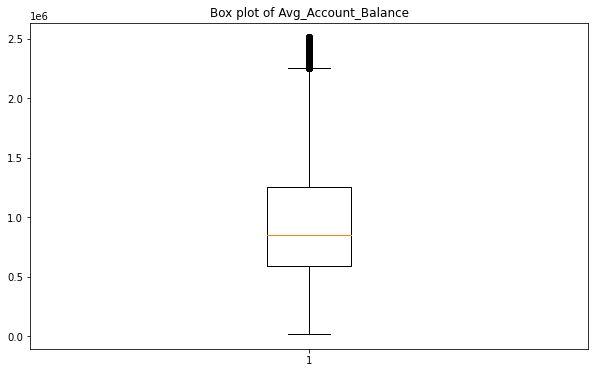

In [1352]:
plt.boxplot(dropping_data['Avg_Account_Balance'])
plt.title('Box plot of Avg_Account_Balance')

In [1353]:
#TRIMMING 



# Define the lower and upper percentiles for trimming
lower_percentile = 5
upper_percentile = 95

# Calculate the percentiles
lower_bound = np.percentile(data['Avg_Account_Balance'], 5)
upper_bound = np.percentile(data['Avg_Account_Balance'], 95)

# Trim the outliers and store the trimmed data in a new DataFrame
trimmed_data = data[(data['Avg_Account_Balance'] >= lower_bound) & (data['Avg_Account_Balance'] <= upper_bound)].copy()

# Alternatively, you can replace the original column with the trimmed values
#data[column_name] = data[column_name].clip(lower_bound, upper_bound)

# Show the updated DataFrame with trimmed data
print(trimmed_data.head())


   Age  Region_Code  Channel_Code  Vintage  Avg_Account_Balance  Is_Lead  \
0   73          268             3       43              1045696        0   
1   30          277             1       32               581988        0   
2   56          268             3       26              1484315        0   
3   34          270             1       19               470454        0   
4   30          282             1       33               886787        0   

   Gender_Male  Occupation_Other  Occupation_Salaried  \
0          0.0               1.0                  0.0   
1          0.0               0.0                  1.0   
2          0.0               0.0                  0.0   
3          1.0               0.0                  1.0   
4          0.0               0.0                  1.0   

   Occupation_Self_Employed  Is_Active_Yes  Credit_Product_Yes  
0                       0.0            0.0                 0.0  
1                       0.0            0.0                 0.0  
2    

In [1354]:
trimmed_data 

,Age,Region_Code,Channel_Code,Vintage,Avg_Account_Balance,Is_Lead,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Is_Active_Yes,Credit_Product_Yes
0,73,268,3,43,1045696,0,0.0,1.0,0.0,0.0,0.0,0.0
1,30,277,1,32,581988,0,0.0,0.0,1.0,0.0,0.0,0.0
2,56,268,3,26,1484315,0,0.0,0.0,0.0,1.0,1.0,0.0
3,34,270,1,19,470454,0,1.0,0.0,1.0,0.0,0.0,0.0
4,30,282,1,33,886787,0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
245720,51,284,3,109,1925586,0,1.0,0.0,0.0,1.0,0.0,0.0
245721,27,268,1,15,862952,0,1.0,0.0,1.0,0.0,1.0,0.0
245722,26,281,1,13,670659,0,0.0,0.0,1.0,0.0,0.0,0.0
245723,28,273,1,31,407504,0,0.0,0.0,1.0,0.0,0.0,0.0


Text(0.5, 1.0, 'Box plot of Avg_Account_Balance')

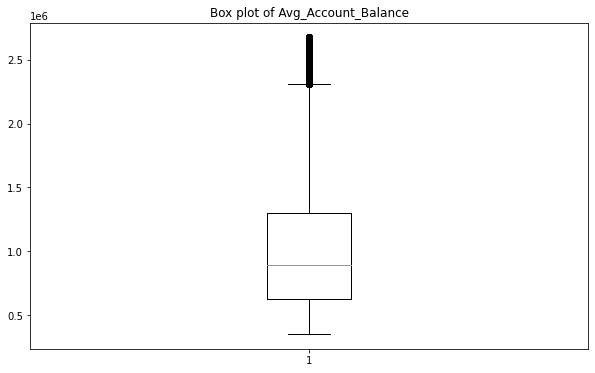

In [1355]:
plt.boxplot(trimmed_data['Avg_Account_Balance'])
plt.title('Box plot of Avg_Account_Balance')

In [1356]:
upper_bound

2673533.0

In [1357]:
trimmed_data['Avg_Account_Balance'].max()

2673533

In [1358]:
#WINSORIZATION 

In [1359]:

# Create a copy of the original DataFrame to work with
winsorized_data = data.copy()

# Select the column to handle outliers ('Avg_Account_Balance' in this case)
column_name = 'Avg_Account_Balance'

# Define the lower and upper percentiles for winsorization (e.g., 5th and 95th percentiles)
lower_percentile = 5
upper_percentile = 90

# Calculate the percentiles
lower_bound = np.percentile(winsorized_data['Avg_Account_Balance'], 5)
upper_bound = np.percentile(winsorized_data['Avg_Account_Balance'], 90)
# Winsorize the data by capping the extreme values
winsorized_data['Avg_Account_Balance'] = winsorized_data['Avg_Account_Balance'].clip(lower_bound, upper_bound)





In [1360]:
winsorized_data

,Age,Region_Code,Channel_Code,Vintage,Avg_Account_Balance,Is_Lead,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Is_Active_Yes,Credit_Product_Yes
0,73,268,3,43,1045696.0,0,0.0,1.0,0.0,0.0,0.0,0.0
1,30,277,1,32,581988.0,0,0.0,0.0,1.0,0.0,0.0,0.0
2,56,268,3,26,1484315.0,0,0.0,0.0,0.0,1.0,1.0,0.0
3,34,270,1,19,470454.0,0,1.0,0.0,1.0,0.0,0.0,0.0
4,30,282,1,33,886787.0,0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
245720,51,284,3,109,1925586.0,0,1.0,0.0,0.0,1.0,0.0,0.0
245721,27,268,1,15,862952.0,0,1.0,0.0,1.0,0.0,1.0,0.0
245722,26,281,1,13,670659.0,0,0.0,0.0,1.0,0.0,0.0,0.0
245723,28,273,1,31,407504.0,0,0.0,0.0,1.0,0.0,0.0,0.0


In [1361]:
winsorized_data['Avg_Account_Balance'].max()

2043591.0

In [1362]:
winsorized_data['Avg_Account_Balance'].min()

352992.8

In [1363]:
lower_bound

352992.8

Text(0.5, 1.0, 'Box plot of Avg_Account_Balance')

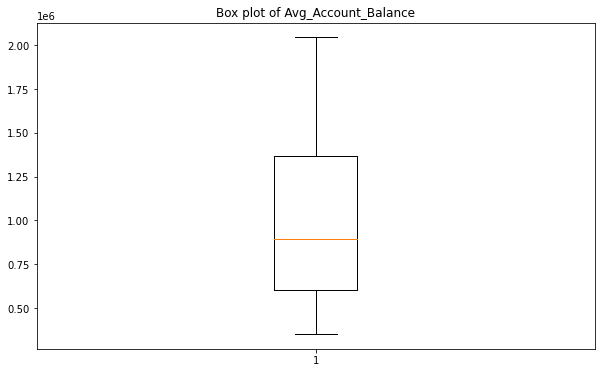

In [1364]:
plt.boxplot(winsorized_data['Avg_Account_Balance'])
plt.title('Box plot of Avg_Account_Balance')

In [1365]:
#BINNING 

In [1366]:
# Create a copy of the original DataFrame                                     #ignore ,just keep for reference , outliers not handled 
BINNING_data = data.copy()


# Define the new bin edges (customize this based on your data)
bins = [10000, 50000, 100000, 500000, 1000000, 3000000, 8000000]

# Define the corresponding labels for the bins
labels = ['10k-50k', '50k-100k', '100k-500k', '500k-1M', '1M-3M', '3M-8M']

# Binning the 'Avg_Account_Balance' column with the updated bins
BINNING_data['Avg_Account_Balance_Binned'] = pd.cut(BINNING_data['Avg_Account_Balance'], bins=bins, labels=labels, right=False)



In [1367]:
BINNING_data

,Age,Region_Code,Channel_Code,Vintage,Avg_Account_Balance,Is_Lead,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Is_Active_Yes,Credit_Product_Yes,Avg_Account_Balance_Binned
0,73,268,3,43,1045696,0,0.0,1.0,0.0,0.0,0.0,0.0,1M-3M
1,30,277,1,32,581988,0,0.0,0.0,1.0,0.0,0.0,0.0,500k-1M
2,56,268,3,26,1484315,0,0.0,0.0,0.0,1.0,1.0,0.0,1M-3M
3,34,270,1,19,470454,0,1.0,0.0,1.0,0.0,0.0,0.0,100k-500k
4,30,282,1,33,886787,0,0.0,0.0,1.0,0.0,0.0,0.0,500k-1M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245720,51,284,3,109,1925586,0,1.0,0.0,0.0,1.0,0.0,0.0,1M-3M
245721,27,268,1,15,862952,0,1.0,0.0,1.0,0.0,1.0,0.0,500k-1M
245722,26,281,1,13,670659,0,0.0,0.0,1.0,0.0,0.0,0.0,500k-1M
245723,28,273,1,31,407504,0,0.0,0.0,1.0,0.0,0.0,0.0,100k-500k


In [1368]:
#The pd.cut() function is used to perform the actual binning operation. It creates categorical bins based on the specified 'bins' and 'labels'. The 'Avg_Account_Balance' column is divided into intervals defined by the 'bins' list, and each row's value is assigned the corresponding label from the 'labels' list. The right=False argument means that the right bin edge should be excluded from the interval, making the intervals left-closed and right-open.
#The  above given code specifically performs binning on the 'Avg_Account_Balance' column, which discretizes the continuous variable into discrete intervals (bins) based on the specified bin edges and labels.




In [1369]:
BINNING_data.dtypes

Age                              int64
Region_Code                      int32
Channel_Code                     int32
Vintage                          int64
Avg_Account_Balance              int64
Is_Lead                          int64
Gender_Male                    float64
Occupation_Other               float64
Occupation_Salaried            float64
Occupation_Self_Employed       float64
Is_Active_Yes                  float64
Credit_Product_Yes             float64
Avg_Account_Balance_Binned    category
dtype: object

In [1370]:
#now you can do one hot for Avg_Account_Balance_Binned 

In [1371]:
#binning approach 2 

In [1372]:
#Detect and handle outliers before binning (Example using IQR method):
# Step 1: Create a copy of the original DataFrame for outlier handling
outlier_handled_data = data.copy()

# Step 2: Calculate the first quartile (Q1) and third quartile (Q3) of the 'Avg_Account_Balance' column
Q1 = outlier_handled_data['Avg_Account_Balance'].quantile(0.25)
Q3 = outlier_handled_data['Avg_Account_Balance'].quantile(0.75)

# Step 3: Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Step 4: Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 5: Replace outliers with the corresponding bin bounds
outlier_handled_data['Avg_Account_Balance'] = outlier_handled_data['Avg_Account_Balance'].clip(lower=lower_bound, upper=upper_bound)

# Step 6: Perform binning on the 'Avg_Account_Balance' column with the updated data
outlier_handled_data['Avg_Account_Balance_Binned'] = pd.cut(outlier_handled_data['Avg_Account_Balance'], bins=bins, labels=labels, right=False)


In [1373]:
outlier_handled_data

,Age,Region_Code,Channel_Code,Vintage,Avg_Account_Balance,Is_Lead,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Is_Active_Yes,Credit_Product_Yes,Avg_Account_Balance_Binned
0,73,268,3,43,1045696.0,0,0.0,1.0,0.0,0.0,0.0,0.0,1M-3M
1,30,277,1,32,581988.0,0,0.0,0.0,1.0,0.0,0.0,0.0,500k-1M
2,56,268,3,26,1484315.0,0,0.0,0.0,0.0,1.0,1.0,0.0,1M-3M
3,34,270,1,19,470454.0,0,1.0,0.0,1.0,0.0,0.0,0.0,100k-500k
4,30,282,1,33,886787.0,0,0.0,0.0,1.0,0.0,0.0,0.0,500k-1M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245720,51,284,3,109,1925586.0,0,1.0,0.0,0.0,1.0,0.0,0.0,1M-3M
245721,27,268,1,15,862952.0,0,1.0,0.0,1.0,0.0,1.0,0.0,500k-1M
245722,26,281,1,13,670659.0,0,0.0,0.0,1.0,0.0,0.0,0.0,500k-1M
245723,28,273,1,31,407504.0,0,0.0,0.0,1.0,0.0,0.0,0.0,100k-500k


In [1374]:
outlier_handled_data['Avg_Account_Balance'].max()

2510200.0

In [1375]:
##Detect and handle outliers after binning:


In [1376]:
outlier_handled_data1 = data.copy()

# Step 2: Define the new bin edges (customize this based on your data)
bins = [10000, 50000, 100000, 500000, 1000000, 3000000, 8000000]

# Step 3: Define the corresponding labels for the bins
labels = ['10k-50k', '50k-100k', '100k-500k', '500k-1M', '1M-3M', '3M-8M']

# Step 4: Binning the 'Avg_Account_Balance' column with the updated bins
outlier_handled_data1 ['Avg_Account_Balance_Binned'] = pd.cut(outlier_handled_data1['Avg_Account_Balance'], bins=bins, labels=labels, right=False)

# Step 5: Detect outliers on the 'Avg_Account_Balance_Binned' column after binning
Q1 = outlier_handled_data1 ['Avg_Account_Balance'].quantile(0.25)
Q3 = outlier_handled_data1 ['Avg_Account_Balance'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 6: Replace outliers with the corresponding bin bounds
outlier_handled_data1['Avg_Account_Balance'] = outlier_handled_data1['Avg_Account_Balance'].clip(lower=lower_bound, upper=upper_bound)


In [1377]:
outlier_handled_data1

,Age,Region_Code,Channel_Code,Vintage,Avg_Account_Balance,Is_Lead,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Is_Active_Yes,Credit_Product_Yes,Avg_Account_Balance_Binned
0,73,268,3,43,1045696.0,0,0.0,1.0,0.0,0.0,0.0,0.0,1M-3M
1,30,277,1,32,581988.0,0,0.0,0.0,1.0,0.0,0.0,0.0,500k-1M
2,56,268,3,26,1484315.0,0,0.0,0.0,0.0,1.0,1.0,0.0,1M-3M
3,34,270,1,19,470454.0,0,1.0,0.0,1.0,0.0,0.0,0.0,100k-500k
4,30,282,1,33,886787.0,0,0.0,0.0,1.0,0.0,0.0,0.0,500k-1M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245720,51,284,3,109,1925586.0,0,1.0,0.0,0.0,1.0,0.0,0.0,1M-3M
245721,27,268,1,15,862952.0,0,1.0,0.0,1.0,0.0,1.0,0.0,500k-1M
245722,26,281,1,13,670659.0,0,0.0,0.0,1.0,0.0,0.0,0.0,500k-1M
245723,28,273,1,31,407504.0,0,0.0,0.0,1.0,0.0,0.0,0.0,100k-500k


In [1378]:
# this step ensures that outliers are "clipped" or restricted to the maximum and minimum values allowed within the range defined by the bin bounds.

In [1379]:
outlier_handled_data1['Avg_Account_Balance'].max()

2510200.0

In [1380]:
outlier_handled_data1['Avg_Account_Balance'].min()

20790.0

In [1381]:
outlier_handled_data1.dtypes

Age                              int64
Region_Code                      int32
Channel_Code                     int32
Vintage                          int64
Avg_Account_Balance            float64
Is_Lead                          int64
Gender_Male                    float64
Occupation_Other               float64
Occupation_Salaried            float64
Occupation_Self_Employed       float64
Is_Active_Yes                  float64
Credit_Product_Yes             float64
Avg_Account_Balance_Binned    category
dtype: object

In [1382]:
#avoid multicollinearity issues between the continuous and binned features. drop either of two on basis of  specific machine learning algorithms you plan to use,

Text(0.5, 1.0, 'Box plot of Avg_Account_Balance')

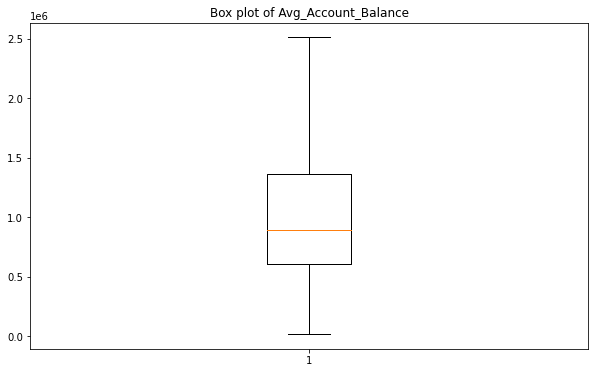

In [1383]:
plt.boxplot(outlier_handled_data1['Avg_Account_Balance'])
plt.title('Box plot of Avg_Account_Balance')

In [1384]:
#IMPUTATION 

In [1385]:

# Create a copy of the original DataFrame for imputation
imputed_data = data.copy()

# Select the column to handle outliers ('Avg_Account_Balance' in this case)
column_name = 'Avg_Account_Balance'

# Calculate the median of the column excluding outliers
median_value = imputed_data[ 'Avg_Account_Balance'].median()

# Define the threshold for outlier detection (customize this based on your data)
outlier_threshold = 1    #NO IDEA HOW TO FIX THIS (2/3 NOT RECMMENDED IF RIGHT SKEWED DATA)

# Detect outliers using the z-score method and replace them with the median value
z_scores = (imputed_data['Avg_Account_Balance'] - median_value) / imputed_data['Avg_Account_Balance'].std()
imputed_data['Avg_Account_Balance'] = imputed_data['Avg_Account_Balance'].where(abs(z_scores) < outlier_threshold, median_value)



In [1386]:
z_scores

0         0.177147
1        -0.366514
2         0.691393
3        -0.497279
4        -0.009161
            ...   
245720    1.208748
245721   -0.037106
245722   -0.262554
245723   -0.571082
245724    0.275138
Name: Avg_Account_Balance, Length: 245725, dtype: float64

In [1387]:
# Find the outliers using the Z-Score method
outliers = imputed_data[abs(z_scores) > outlier_threshold]

# Display the rows containing the outliers
print(outliers)

        Age  Region_Code  Channel_Code  Vintage  Avg_Account_Balance  Is_Lead  \
9        55          268             2       49             894601.0        0   
16       46          268             3       97             894601.0        1   
17       59          283             3       15             894601.0        1   
35       29          284             1       26             894601.0        0   
43       61          254             2      103             894601.0        1   
...     ...          ...           ...      ...                  ...      ...   
245665   44          281             3       92             894601.0        1   
245672   35          268             1       32             894601.0        0   
245676   35          253             2       61             894601.0        0   
245701   32          277             1       13             894601.0        0   
245720   51          284             3      109             894601.0        0   

        Gender_Male  Occupa

In [1388]:
median_value

894601.0

In [1389]:
imputed_data

,Age,Region_Code,Channel_Code,Vintage,Avg_Account_Balance,Is_Lead,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Is_Active_Yes,Credit_Product_Yes
0,73,268,3,43,1045696.0,0,0.0,1.0,0.0,0.0,0.0,0.0
1,30,277,1,32,581988.0,0,0.0,0.0,1.0,0.0,0.0,0.0
2,56,268,3,26,1484315.0,0,0.0,0.0,0.0,1.0,1.0,0.0
3,34,270,1,19,470454.0,0,1.0,0.0,1.0,0.0,0.0,0.0
4,30,282,1,33,886787.0,0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
245720,51,284,3,109,894601.0,0,1.0,0.0,0.0,1.0,0.0,0.0
245721,27,268,1,15,862952.0,0,1.0,0.0,1.0,0.0,1.0,0.0
245722,26,281,1,13,670659.0,0,0.0,0.0,1.0,0.0,0.0,0.0
245723,28,273,1,31,407504.0,0,0.0,0.0,1.0,0.0,0.0,0.0


In [1390]:
count_target_value = (imputed_data['Avg_Account_Balance'] == median_value).sum()


In [1391]:
count_target_value 

36270

Text(0.5, 1.0, 'Boxplot of Avg_Account_Balance')

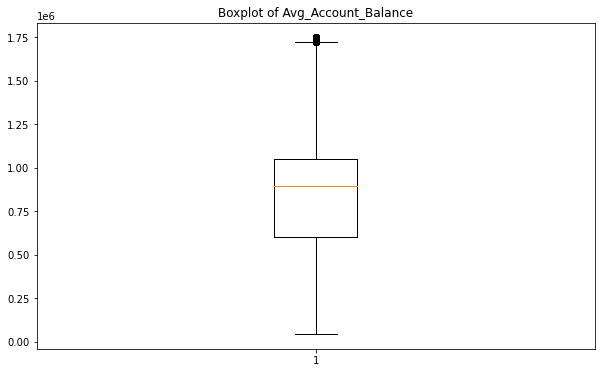

In [1392]:
plt.boxplot(imputed_data['Avg_Account_Balance'])
plt.title("Boxplot of Avg_Account_Balance")

In [1393]:
#imputation 2

In [1394]:
# Create a copy of the original DataFrame for imputation
imputed_data1 = data.copy()

# Select the column to handle outliers ('Avg_Account_Balance' in this case)
column_name = 'Avg_Account_Balance'

# Calculate the first quartile (25th percentile) and third quartile (75th percentile) of the column
Q1 = imputed_data1[column_name].quantile(0.25)
Q3 = imputed_data1[column_name].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the median value
median_value = imputed_data1[column_name].median()
imputed_data1[column_name] = imputed_data1[column_name].where((imputed_data1[column_name] >= lower_bound) & (imputed_data1[column_name] <= upper_bound), median_value)


In [1395]:
imputed_data1

,Age,Region_Code,Channel_Code,Vintage,Avg_Account_Balance,Is_Lead,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Is_Active_Yes,Credit_Product_Yes
0,73,268,3,43,1045696.0,0,0.0,1.0,0.0,0.0,0.0,0.0
1,30,277,1,32,581988.0,0,0.0,0.0,1.0,0.0,0.0,0.0
2,56,268,3,26,1484315.0,0,0.0,0.0,0.0,1.0,1.0,0.0
3,34,270,1,19,470454.0,0,1.0,0.0,1.0,0.0,0.0,0.0
4,30,282,1,33,886787.0,0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
245720,51,284,3,109,1925586.0,0,1.0,0.0,0.0,1.0,0.0,0.0
245721,27,268,1,15,862952.0,0,1.0,0.0,1.0,0.0,1.0,0.0
245722,26,281,1,13,670659.0,0,0.0,0.0,1.0,0.0,0.0,0.0
245723,28,273,1,31,407504.0,0,0.0,0.0,1.0,0.0,0.0,0.0


In [1396]:
median_value

894601.0

In [1397]:
lower_bound

-539224.0

In [1398]:
upper_bound

2510200.0

In [1399]:
imputed_data1['Avg_Account_Balance'].max()

2509800.0

In [1400]:
imputed_data1['Avg_Account_Balance'].min()

20790.0

In [1401]:
count_target_value = (imputed_data1['Avg_Account_Balance'] == median_value).sum()
#This count represents the number of occurrences of the median_value in the 'Avg_Account_Balance' column.

In [1402]:
count_target_value

14619

Text(0.5, 1.0, 'Boxplot of Avg_Account_Balance')

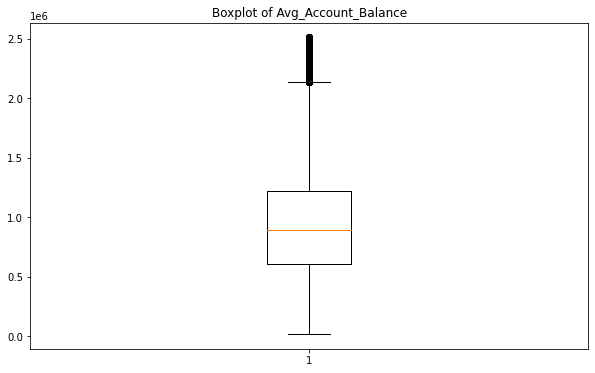

In [1403]:
plt.boxplot(imputed_data1['Avg_Account_Balance'])
plt.title("Boxplot of Avg_Account_Balance")

In [1404]:
#capping and flooring 
duplicate_data = data.copy()
# Select the column to handle outliers ('Avg_Account_Balance' in this case)
column_name = 'Avg_Account_Balance'

# Define the lower and upper bounds for capping
lower_bound = 20000  # Replace with your desired lower bound
upper_bound = 9000000  # Replace with your desired upper bound

# Apply capping to the 'Avg_Account_Balance' column
duplicate_data['Avg_Account_Balance'] = duplicate_data['Avg_Account_Balance'].clip(lower_bound, upper_bound)



In [1405]:
duplicate_data

,Age,Region_Code,Channel_Code,Vintage,Avg_Account_Balance,Is_Lead,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Is_Active_Yes,Credit_Product_Yes
0,73,268,3,43,1045696,0,0.0,1.0,0.0,0.0,0.0,0.0
1,30,277,1,32,581988,0,0.0,0.0,1.0,0.0,0.0,0.0
2,56,268,3,26,1484315,0,0.0,0.0,0.0,1.0,1.0,0.0
3,34,270,1,19,470454,0,1.0,0.0,1.0,0.0,0.0,0.0
4,30,282,1,33,886787,0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
245720,51,284,3,109,1925586,0,1.0,0.0,0.0,1.0,0.0,0.0
245721,27,268,1,15,862952,0,1.0,0.0,1.0,0.0,1.0,0.0
245722,26,281,1,13,670659,0,0.0,0.0,1.0,0.0,0.0,0.0
245723,28,273,1,31,407504,0,0.0,0.0,1.0,0.0,0.0,0.0


In [1406]:
duplicate_data['Avg_Account_Balance'].max()

9000000

In [1407]:
duplicate_data['Avg_Account_Balance'].min()

20790

In [1408]:
#just for understanding 
# Define the limit for filtering values
limit = 9000000 # Customize this limit based on your requirement

# Use boolean indexing to filter values above the limit
values_above_limit = data[data['Avg_Account_Balance'] > limit]

# Display the filtered DataFrame
print(values_above_limit)


        Age  Region_Code  Channel_Code  Vintage  Avg_Account_Balance  Is_Lead  \
17223    29          268             1       21              9105634        0   
31725    29          254             1       27              9173120        0   
50654    33          269             1       26              9346115        0   
64614    44          268             2       86              9459897        1   
69209    53          268             3       79              9792796        1   
70129    40          276             2       33              9244599        0   
71144    31          254             1       32              9088520        0   
73194    46          283             3       99              9008509        1   
83053    30          268             1       19              9226215        0   
107815   30          283             1       20              9000069        0   
117863   28          254             1       31              9216845        0   
119655   26          254    

In [1409]:
# Check if outliers have been replaced
outliers_replaced = (duplicate_data['Avg_Account_Balance'] != data['Avg_Account_Balance'])

# Display the rows where outliers have been replaced
print(duplicate_data[outliers_replaced])

        Age  Region_Code  Channel_Code  Vintage  Avg_Account_Balance  Is_Lead  \
17223    29          268             1       21              9000000        0   
31725    29          254             1       27              9000000        0   
50654    33          269             1       26              9000000        0   
64614    44          268             2       86              9000000        1   
69209    53          268             3       79              9000000        1   
70129    40          276             2       33              9000000        0   
71144    31          254             1       32              9000000        0   
73194    46          283             3       99              9000000        1   
83053    30          268             1       19              9000000        0   
107815   30          283             1       20              9000000        0   
117863   28          254             1       31              9000000        0   
119655   26          254    

Text(0.5, 1.0, 'Boxplot of Avg_Account_Balance')

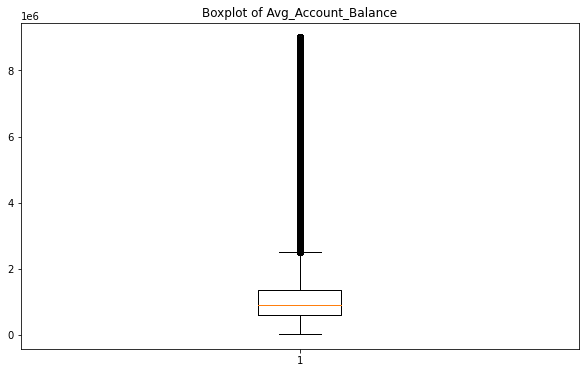

In [1410]:
plt.boxplot(duplicate_data['Avg_Account_Balance'])
plt.title("Boxplot of Avg_Account_Balance")

In [1411]:
#transformation 
#log transformation:

credit_card_data = data.copy()
# Log transformation on the "avg_account_balance" column
credit_card_data['Avg_Account_Balance_log'] = np.log(credit_card_data['Avg_Account_Balance'])

# Print the DataFrame to observe the transformation
print(credit_card_data)


        Age  Region_Code  Channel_Code  Vintage  Avg_Account_Balance  Is_Lead  \
0        73          268             3       43              1045696        0   
1        30          277             1       32               581988        0   
2        56          268             3       26              1484315        0   
3        34          270             1       19               470454        0   
4        30          282             1       33               886787        0   
...     ...          ...           ...      ...                  ...      ...   
245720   51          284             3      109              1925586        0   
245721   27          268             1       15               862952        0   
245722   26          281             1       13               670659        0   
245723   28          273             1       31               407504        0   
245724   29          269             1       21              1129276        0   

        Gender_Male  Occupa

Text(0.5, 1.0, 'Box Plot of Log-Transformed Avg_Account_Balance')

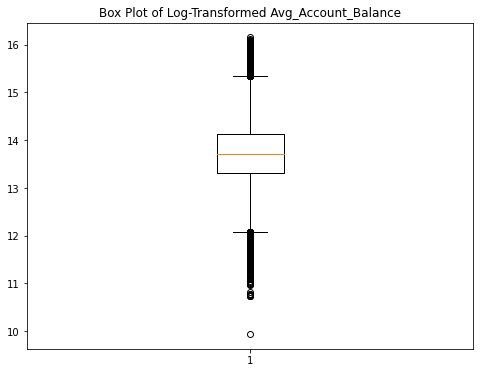

In [1412]:
plt.figure(figsize=(8, 6))
plt.boxplot(credit_card_data['Avg_Account_Balance_log'])
plt.title('Box Plot of Log-Transformed Avg_Account_Balance')

In [1413]:
credit_card_data

,Age,Region_Code,Channel_Code,Vintage,Avg_Account_Balance,Is_Lead,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Is_Active_Yes,Credit_Product_Yes,Avg_Account_Balance_log
0,73,268,3,43,1045696,0,0.0,1.0,0.0,0.0,0.0,0.0,13.860193
1,30,277,1,32,581988,0,0.0,0.0,1.0,0.0,0.0,0.0,13.274205
2,56,268,3,26,1484315,0,0.0,0.0,0.0,1.0,1.0,0.0,14.210464
3,34,270,1,19,470454,0,1.0,0.0,1.0,0.0,0.0,0.0,13.061453
4,30,282,1,33,886787,0,0.0,0.0,1.0,0.0,0.0,0.0,13.695360
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245720,51,284,3,109,1925586,0,1.0,0.0,0.0,1.0,0.0,0.0,14.470741
245721,27,268,1,15,862952,0,1.0,0.0,1.0,0.0,1.0,0.0,13.668114
245722,26,281,1,13,670659,0,0.0,0.0,1.0,0.0,0.0,0.0,13.416016
245723,28,273,1,31,407504,0,0.0,0.0,1.0,0.0,0.0,0.0,12.917806


In [1414]:
credit_card_data.dtypes

Age                           int64
Region_Code                   int32
Channel_Code                  int32
Vintage                       int64
Avg_Account_Balance           int64
Is_Lead                       int64
Gender_Male                 float64
Occupation_Other            float64
Occupation_Salaried         float64
Occupation_Self_Employed    float64
Is_Active_Yes               float64
Credit_Product_Yes          float64
Avg_Account_Balance_log     float64
dtype: object

In [1415]:
# credit_card_data already contains the 'Avg_Account_Balance_log' column from the log transformation
# Drop the original 'Avg_Account_Balance' column
#credit_card_data.drop(columns=['Avg_Account_Balance'], inplace=True)

# Rename the 'Avg_Account_Balance_log' column to 'Avg_Account_Balance'
#credit_card_data.rename(columns={'Avg_Account_Balance_log': 'Avg_Account_Balance'}, inplace=True)

# Print the DataFrame to see the updated version with the log-transformed column
#print(credit_card_data)


In [1416]:
#SQUAREROOT TRANSFORMATION
credit_card_data1 = data.copy()
# Square root transformation on the "avg_account_balance" column
credit_card_data1['Avg_Account_Balance_sqrt'] = np.sqrt(credit_card_data1['Avg_Account_Balance'])

# Print the DataFrame to observe the transformation
print(credit_card_data1)

        Age  Region_Code  Channel_Code  Vintage  Avg_Account_Balance  Is_Lead  \
0        73          268             3       43              1045696        0   
1        30          277             1       32               581988        0   
2        56          268             3       26              1484315        0   
3        34          270             1       19               470454        0   
4        30          282             1       33               886787        0   
...     ...          ...           ...      ...                  ...      ...   
245720   51          284             3      109              1925586        0   
245721   27          268             1       15               862952        0   
245722   26          281             1       13               670659        0   
245723   28          273             1       31               407504        0   
245724   29          269             1       21              1129276        0   

        Gender_Male  Occupa

Text(0.5, 1.0, 'Box Plot of sqrt-Transformed Avg_Account_Balance')

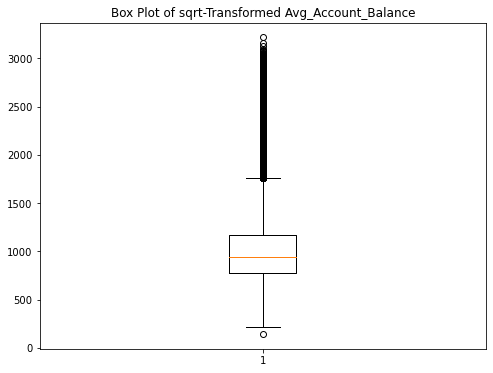

In [1417]:
plt.figure(figsize=(8, 6))
plt.boxplot(credit_card_data1['Avg_Account_Balance_sqrt'])
plt.title('Box Plot of sqrt-Transformed Avg_Account_Balance')

In [1418]:
#NORMALISATION IS ALSO PART OF TRANSFORMATION 

# STANDARDISATION ON WINSORIZED DATA

In [1419]:
x=winsorized_data[['Age','Avg_Account_Balance','Vintage']]

In [1420]:
y=winsorized_data['Is_Lead']

In [1421]:
from sklearn.preprocessing import StandardScaler

# Assuming 'x' contains the winsorized data
scaler = StandardScaler()
x = scaler.fit_transform(x)


In [1422]:
type(x)

numpy.ndarray

In [1423]:
x=pd.DataFrame(x)

In [1424]:
x

,0,1,2
0,1.965365,0.032695,-0.122373
1,-0.934429,-0.850078,-0.462372
2,0.818935,0.867705,-0.647825
3,-0.664680,-1.062409,-0.864188
4,-0.934429,-0.269825,-0.431463
...,...,...,...
245720,0.481750,1.707764,1.917619
245721,-1.136740,-0.315200,-0.987824
245722,-1.204177,-0.681273,-1.049642
245723,-1.069303,-1.182248,-0.493281


In [1425]:
x.columns=['Age','Avg_Account_Balance','Vintage']

In [1426]:
x

,Age,Avg_Account_Balance,Vintage
0,1.965365,0.032695,-0.122373
1,-0.934429,-0.850078,-0.462372
2,0.818935,0.867705,-0.647825
3,-0.664680,-1.062409,-0.864188
4,-0.934429,-0.269825,-0.431463
...,...,...,...
245720,0.481750,1.707764,1.917619
245721,-1.136740,-0.315200,-0.987824
245722,-1.204177,-0.681273,-1.049642
245723,-1.069303,-1.182248,-0.493281


In [1427]:
winsorized_data1 = data.copy()

In [1428]:
x=winsorized_data1['Avg_Account_Balance']
y=winsorized_data1['Is_Lead']

In [1429]:
# Convert 'x' to a 2D array if it's a single feature
if len(x.shape) == 1:
    x = x.values.reshape(-1, 1)

In [1430]:
from sklearn.preprocessing import StandardScaler

# Assuming 'x' contains the winsorized data
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [1431]:
type(x)

numpy.ndarray

In [1432]:
x=pd.DataFrame(x)

In [1433]:
x

,0
0,-0.096968
1,-0.640630
2,0.417279
3,-0.771395
4,-0.283276
...,...
245720,0.934635
245721,-0.311221
245722,-0.536670
245723,-0.845199


In [1434]:
x.columns=['Avg_Account_Balance']

In [1435]:
x

,Avg_Account_Balance
0,-0.096968
1,-0.640630
2,0.417279
3,-0.771395
4,-0.283276
...,...
245720,0.934635
245721,-0.311221
245722,-0.536670
245723,-0.845199


In [1436]:


# Assuming 'x' and 'winsorized_data' are DataFrames, and you have already standardized 'Avg_Account_Balance' in 'winsorized_data'
# Drop the original 'Avg_Account_Balance' column from 'winsorized_data'
winsorized_data1.drop('Avg_Account_Balance', axis=1, inplace=True)

# Concatenate 'x' with 'winsorized_data' (including the standardized 'Avg_Account_Balance')
x1 = pd.concat([x, winsorized_data1], axis=1)


In [1437]:
x1

,Avg_Account_Balance,Age,Region_Code,Channel_Code,Vintage,Is_Lead,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Is_Active_Yes,Credit_Product_Yes
0,-0.096968,73,268,3,43,0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.640630,30,277,1,32,0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.417279,56,268,3,26,0,0.0,0.0,0.0,1.0,1.0,0.0
3,-0.771395,34,270,1,19,0,1.0,0.0,1.0,0.0,0.0,0.0
4,-0.283276,30,282,1,33,0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
245720,0.934635,51,284,3,109,0,1.0,0.0,0.0,1.0,0.0,0.0
245721,-0.311221,27,268,1,15,0,1.0,0.0,1.0,0.0,1.0,0.0
245722,-0.536670,26,281,1,13,0,0.0,0.0,1.0,0.0,0.0,0.0
245723,-0.845199,28,273,1,31,0,0.0,0.0,1.0,0.0,0.0,0.0


# Normalisation 

In [1438]:
x=winsorized_data[['Age','Avg_Account_Balance','Vintage']]

In [1439]:
y=winsorized_data['Is_Lead']

In [1440]:
from sklearn.preprocessing import normalize
x=normalize(x)

In [1441]:
type(x)

numpy.ndarray

In [1442]:
x=pd.DataFrame(x)

In [1443]:
x

,0,1,2
0,0.000070,1.0,0.000041
1,0.000052,1.0,0.000055
2,0.000038,1.0,0.000018
3,0.000072,1.0,0.000040
4,0.000034,1.0,0.000037
...,...,...,...
245720,0.000026,1.0,0.000057
245721,0.000031,1.0,0.000017
245722,0.000039,1.0,0.000019
245723,0.000069,1.0,0.000076


In [1444]:
x.columns=['Age','Avg_Account_Balance','Vintage']

In [1445]:
x

,Age,Avg_Account_Balance,Vintage
0,0.000070,1.0,0.000041
1,0.000052,1.0,0.000055
2,0.000038,1.0,0.000018
3,0.000072,1.0,0.000040
4,0.000034,1.0,0.000037
...,...,...,...
245720,0.000026,1.0,0.000057
245721,0.000031,1.0,0.000017
245722,0.000039,1.0,0.000019
245723,0.000069,1.0,0.000076


# MIN MAX SCALING 

In [1446]:
x=winsorized_data[['Age','Avg_Account_Balance','Vintage']]

In [1447]:
y=winsorized_data['Is_Lead']

In [1448]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler(feature_range=(0,1))
x=min_max.fit_transform(x)

In [1449]:
type(x)

numpy.ndarray

In [1450]:
x=pd.DataFrame(x)

In [1451]:
type(x)

pandas.core.frame.DataFrame

In [1452]:
x

,0,1,2
0,0.806452,0.409739,0.281250
1,0.112903,0.135452,0.195312
2,0.532258,0.669185,0.148438
3,0.177419,0.069479,0.093750
4,0.112903,0.315743,0.203125
...,...,...,...
245720,0.451613,0.930199,0.796875
245721,0.064516,0.301644,0.062500
245722,0.048387,0.187902,0.046875
245723,0.080645,0.032244,0.187500


In [1453]:
x.columns=['Age','Avg_Account_Balance','Vintage']

In [1454]:
x

,Age,Avg_Account_Balance,Vintage
0,0.806452,0.409739,0.281250
1,0.112903,0.135452,0.195312
2,0.532258,0.669185,0.148438
3,0.177419,0.069479,0.093750
4,0.112903,0.315743,0.203125
...,...,...,...
245720,0.451613,0.930199,0.796875
245721,0.064516,0.301644,0.062500
245722,0.048387,0.187902,0.046875
245723,0.080645,0.032244,0.187500


In [1455]:
x=winsorized_data['Avg_Account_Balance']
y=winsorized_data['Is_Lead']

In [1456]:
# Convert 'x' to a 2D array if it's a single feature
if len(x.shape) == 1:
    x = x.values.reshape(-1, 1)

In [1457]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler(feature_range=(0,1))
x=min_max.fit_transform(x)

In [1458]:
type(x)

numpy.ndarray

In [1459]:
x=pd.DataFrame(x)

In [1460]:
type(x)

pandas.core.frame.DataFrame

In [1461]:
x

,0
0,0.409739
1,0.135452
2,0.669185
3,0.069479
4,0.315743
...,...
245720,0.930199
245721,0.301644
245722,0.187902
245723,0.032244


In [1462]:
x.columns=['Avg_Account_Balance']

In [1463]:
x

,Avg_Account_Balance
0,0.409739
1,0.135452
2,0.669185
3,0.069479
4,0.315743
...,...
245720,0.930199
245721,0.301644
245722,0.187902
245723,0.032244


# correlation

In [1464]:
data

,Age,Region_Code,Channel_Code,Vintage,Avg_Account_Balance,Is_Lead,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Is_Active_Yes,Credit_Product_Yes
0,73,268,3,43,1045696,0,0.0,1.0,0.0,0.0,0.0,0.0
1,30,277,1,32,581988,0,0.0,0.0,1.0,0.0,0.0,0.0
2,56,268,3,26,1484315,0,0.0,0.0,0.0,1.0,1.0,0.0
3,34,270,1,19,470454,0,1.0,0.0,1.0,0.0,0.0,0.0
4,30,282,1,33,886787,0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
245720,51,284,3,109,1925586,0,1.0,0.0,0.0,1.0,0.0,0.0
245721,27,268,1,15,862952,0,1.0,0.0,1.0,0.0,1.0,0.0
245722,26,281,1,13,670659,0,0.0,0.0,1.0,0.0,0.0,0.0
245723,28,273,1,31,407504,0,0.0,0.0,1.0,0.0,0.0,0.0


In [1465]:
corr_matrix=data.corr()

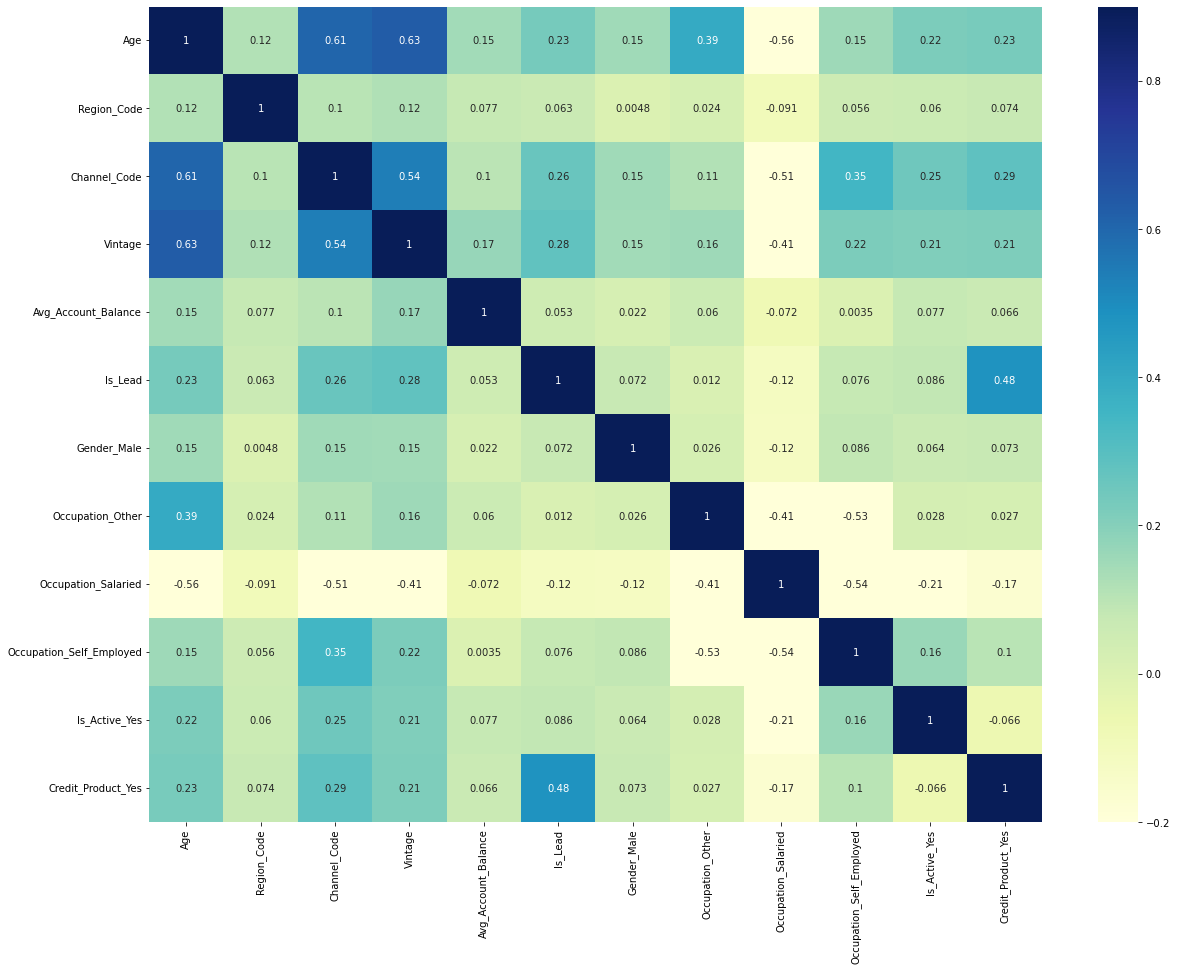

In [1466]:

# Set the figure size before plotting the heatmap
plt.figure(figsize=(20, 15))

# Plot the heatmap with the specified figure size
sns.heatmap(corr_matrix, vmin=-0.2, vmax=0.9, annot=True, cmap='YlGnBu')

plt.show()


# FEATURE ENGINEERING 

In [1494]:
engineering_data = data.copy()

In [1495]:


# Assuming 'data' is your DataFrame, and 'Vintage' is the column containing timestamp information
#engineering_data['Vintage'] = pd.to_datetime(engineering_data['Vintage'])

# Extract additional date/time features
#engineering_data['Vintage_DayOfWeek'] = engineering_data['Vintage'].dt.dayofweek
#engineering_data['Vintage_Month'] = engineering_data['Vintage'].dt.month
#engineering_data['Vintage_Season'] = (engineering_data['Vintage'].dt.month % 12 + 3) // 3

# Season mapping (Optional, you can customize the mapping based on your needs)
#season_mapping = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Autumn'}
#engineering_data['Vintage_Season'] = engineering_data['Vintage_Season'].map(season_mapping)

# Display the modified DataFrame with additional features
#print(engineering_data.head())


In [1496]:
import pandas as pd


# Extract additional features from the 'Vintage' column
engineering_data['Vintage_Years'] = engineering_data['Vintage'] // 12
engineering_data['Vintage_Months'] = engineering_data['Vintage'] % 12
engineering_data['Vintage_Quarter'] = (engineering_data['Vintage'] - 1) // 3 + 1
# You can add more features like days, weeks, etc. if needed.

# Display the result
print(engineering_data)


        Age  Region_Code  Channel_Code  Vintage  Avg_Account_Balance  Is_Lead  \
0        73          268             3       43              1045696        0   
1        30          277             1       32               581988        0   
2        56          268             3       26              1484315        0   
3        34          270             1       19               470454        0   
4        30          282             1       33               886787        0   
...     ...          ...           ...      ...                  ...      ...   
245720   51          284             3      109              1925586        0   
245721   27          268             1       15               862952        0   
245722   26          281             1       13               670659        0   
245723   28          273             1       31               407504        0   
245724   29          269             1       21              1129276        0   

        Gender_Male  Occupa

In [1497]:
engineering_data.dtypes

Age                           int64
Region_Code                   int32
Channel_Code                  int32
Vintage                       int64
Avg_Account_Balance           int64
Is_Lead                       int64
Gender_Male                 float64
Occupation_Other            float64
Occupation_Salaried         float64
Occupation_Self_Employed    float64
Is_Active_Yes               float64
Credit_Product_Yes          float64
Vintage_Years                 int64
Vintage_Months                int64
Vintage_Quarter               int64
dtype: object

In [1498]:
import pandas as pd

# Assuming 'engineering_data' is your DataFrame, and 'Vintage' is the column containing timestamp information
engineering_data['Vintage'] = pd.to_datetime(engineering_data['Vintage'])

# Extract the year from the 'Vintage' column
engineering_data['Vintage_Year'] = engineering_data['Vintage'].dt.year

# Display the modified DataFrame with the 'Vintage_Year' column
print(engineering_data.head())


   Age  Region_Code  Channel_Code                       Vintage  \
0   73          268             3 1970-01-01 00:00:00.000000043   
1   30          277             1 1970-01-01 00:00:00.000000032   
2   56          268             3 1970-01-01 00:00:00.000000026   
3   34          270             1 1970-01-01 00:00:00.000000019   
4   30          282             1 1970-01-01 00:00:00.000000033   

   Avg_Account_Balance  Is_Lead  Gender_Male  Occupation_Other  \
0              1045696        0          0.0               1.0   
1               581988        0          0.0               0.0   
2              1484315        0          0.0               0.0   
3               470454        0          1.0               0.0   
4               886787        0          0.0               0.0   

   Occupation_Salaried  Occupation_Self_Employed  Is_Active_Yes  \
0                  0.0                       0.0            0.0   
1                  1.0                       0.0            0.0   

In [1499]:
import pandas as pd

# Assuming 'engineering_data' is your DataFrame and 'Vintage' represents the number of months

# Convert the 'Vintage' column to a valid date by adding it to a fixed reference date
reference_date = pd.to_datetime('1970-01-01')
engineering_data['Vintage'] = reference_date + pd.to_timedelta(engineering_data['Vintage'] * 30, unit='D')

# Extract additional date/time features using .apply()
engineering_data['Vintage_DayOfWeek'] = engineering_data['Vintage'].dt.dayofweek
engineering_data['Vintage_Month'] = engineering_data['Vintage'].dt.month

# Extract the quarter information from the 'Vintage' column using .apply()
engineering_data['Vintage_Quarter'] = engineering_data['Vintage'].dt.quarter

# Display the modified DataFrame with additional features
print(engineering_data.head())


TypeError: cannot perform __mul__ with this index type: DatetimeArray

In [1500]:
engineering_data

,Age,Region_Code,Channel_Code,Vintage,Avg_Account_Balance,Is_Lead,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Is_Active_Yes,Credit_Product_Yes,Vintage_Years,Vintage_Months,Vintage_Quarter,Vintage_Year
0,73,268,3,1970-01-01 00:00:00.000000043,1045696,0,0.0,1.0,0.0,0.0,0.0,0.0,3,7,15,1970
1,30,277,1,1970-01-01 00:00:00.000000032,581988,0,0.0,0.0,1.0,0.0,0.0,0.0,2,8,11,1970
2,56,268,3,1970-01-01 00:00:00.000000026,1484315,0,0.0,0.0,0.0,1.0,1.0,0.0,2,2,9,1970
3,34,270,1,1970-01-01 00:00:00.000000019,470454,0,1.0,0.0,1.0,0.0,0.0,0.0,1,7,7,1970
4,30,282,1,1970-01-01 00:00:00.000000033,886787,0,0.0,0.0,1.0,0.0,0.0,0.0,2,9,11,1970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245720,51,284,3,1970-01-01 00:00:00.000000109,1925586,0,1.0,0.0,0.0,1.0,0.0,0.0,9,1,37,1970
245721,27,268,1,1970-01-01 00:00:00.000000015,862952,0,1.0,0.0,1.0,0.0,1.0,0.0,1,3,5,1970
245722,26,281,1,1970-01-01 00:00:00.000000013,670659,0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,5,1970
245723,28,273,1,1970-01-01 00:00:00.000000031,407504,0,0.0,0.0,1.0,0.0,0.0,0.0,2,7,11,1970


In [1501]:
import pandas as pd

# Assuming 'engineering_data' is your DataFrame, and 'date' is the column containing timestamp information
engineering_data['Vintage'] = pd.to_datetime(engineering_data['Vintage'])

# Extract additional date/time features using .apply()
engineering_data['Vintage_DayOfWeek'] = engineering_data['Vintage'].apply(lambda x: x.dayofweek)
engineering_data['Vintage_Month'] = engineering_data['Vintage'].apply(lambda x: x.month)

# Extract the quarter information from the 'date' column using .apply()
engineering_data['Vintage_Quarter'] = engineering_data['Vintage'].apply(lambda x: x.quarter)

# Display the modified DataFrame with additional features
print(engineering_data.head())


   Age  Region_Code  Channel_Code                       Vintage  \
0   73          268             3 1970-01-01 00:00:00.000000043   
1   30          277             1 1970-01-01 00:00:00.000000032   
2   56          268             3 1970-01-01 00:00:00.000000026   
3   34          270             1 1970-01-01 00:00:00.000000019   
4   30          282             1 1970-01-01 00:00:00.000000033   

   Avg_Account_Balance  Is_Lead  Gender_Male  Occupation_Other  \
0              1045696        0          0.0               1.0   
1               581988        0          0.0               0.0   
2              1484315        0          0.0               0.0   
3               470454        0          1.0               0.0   
4               886787        0          0.0               0.0   

   Occupation_Salaried  Occupation_Self_Employed  Is_Active_Yes  \
0                  0.0                       0.0            0.0   
1                  1.0                       0.0            0.0   

In [1502]:
import pandas as pd

# Assuming 'engineering_data' is your DataFrame, and 'Vintage' is the column containing timestamp information
engineering_data['Vintage'] = pd.to_datetime(engineering_data['Vintage'])

# Extract additional date/time features
engineering_data['Vintage_DayOfWeek'] = engineering_data['Vintage'].dt.dayofweek
engineering_data['Vintage_Month'] = engineering_data['Vintage'].apply(lambda x:x.month)

# Extract the quarter information from the 'Vintage' column
engineering_data['Vintage_Quarter'] = engineering_data['Vintage'].dt.quarter

# Display the modified DataFrame with additional features
print(engineering_data.head())


   Age  Region_Code  Channel_Code                       Vintage  \
0   73          268             3 1970-01-01 00:00:00.000000043   
1   30          277             1 1970-01-01 00:00:00.000000032   
2   56          268             3 1970-01-01 00:00:00.000000026   
3   34          270             1 1970-01-01 00:00:00.000000019   
4   30          282             1 1970-01-01 00:00:00.000000033   

   Avg_Account_Balance  Is_Lead  Gender_Male  Occupation_Other  \
0              1045696        0          0.0               1.0   
1               581988        0          0.0               0.0   
2              1484315        0          0.0               0.0   
3               470454        0          1.0               0.0   
4               886787        0          0.0               0.0   

   Occupation_Salaried  Occupation_Self_Employed  Is_Active_Yes  \
0                  0.0                       0.0            0.0   
1                  1.0                       0.0            0.0   

In [1503]:
engineering_data

,Age,Region_Code,Channel_Code,Vintage,Avg_Account_Balance,Is_Lead,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Is_Active_Yes,Credit_Product_Yes,Vintage_Years,Vintage_Months,Vintage_Quarter,Vintage_Year,Vintage_DayOfWeek,Vintage_Month
0,73,268,3,1970-01-01 00:00:00.000000043,1045696,0,0.0,1.0,0.0,0.0,0.0,0.0,3,7,1,1970,3,1
1,30,277,1,1970-01-01 00:00:00.000000032,581988,0,0.0,0.0,1.0,0.0,0.0,0.0,2,8,1,1970,3,1
2,56,268,3,1970-01-01 00:00:00.000000026,1484315,0,0.0,0.0,0.0,1.0,1.0,0.0,2,2,1,1970,3,1
3,34,270,1,1970-01-01 00:00:00.000000019,470454,0,1.0,0.0,1.0,0.0,0.0,0.0,1,7,1,1970,3,1
4,30,282,1,1970-01-01 00:00:00.000000033,886787,0,0.0,0.0,1.0,0.0,0.0,0.0,2,9,1,1970,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245720,51,284,3,1970-01-01 00:00:00.000000109,1925586,0,1.0,0.0,0.0,1.0,0.0,0.0,9,1,1,1970,3,1
245721,27,268,1,1970-01-01 00:00:00.000000015,862952,0,1.0,0.0,1.0,0.0,1.0,0.0,1,3,1,1970,3,1
245722,26,281,1,1970-01-01 00:00:00.000000013,670659,0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,1,1970,3,1
245723,28,273,1,1970-01-01 00:00:00.000000031,407504,0,0.0,0.0,1.0,0.0,0.0,0.0,2,7,1,1970,3,1


In [1504]:
engineering_data['Vintage_DayOfWeek'].value_counts()

3    245725
Name: Vintage_DayOfWeek, dtype: int64

In [1505]:
engineering_data['Vintage_Month'].value_counts()

1    245725
Name: Vintage_Month, dtype: int64

In [1506]:
engineering_data['Vintage_Quarter'].value_counts()

1    245725
Name: Vintage_Quarter, dtype: int64

In [1507]:
#import pandas as pd

# Assuming 'data' is your DataFrame, and 'Age' is the column representing ages
# Define the bin edges and corresponding labels
age_bins = [0, 30, 50, float('inf')]  # Customize the age bins as per your preference
age_labels = ['Young', 'Middle-aged', 'Senior']

# Create the 'Age_Group' column based on the age bins
engineering_data['Age_Group'] = pd.cut(engineering_data['Age'], bins=age_bins, labels=age_labels, right=False)

# Display the modified DataFrame with the new 'Age_Group' column
print(engineering_data.head())


   Age  Region_Code  Channel_Code                       Vintage  \
0   73          268             3 1970-01-01 00:00:00.000000043   
1   30          277             1 1970-01-01 00:00:00.000000032   
2   56          268             3 1970-01-01 00:00:00.000000026   
3   34          270             1 1970-01-01 00:00:00.000000019   
4   30          282             1 1970-01-01 00:00:00.000000033   

   Avg_Account_Balance  Is_Lead  Gender_Male  Occupation_Other  \
0              1045696        0          0.0               1.0   
1               581988        0          0.0               0.0   
2              1484315        0          0.0               0.0   
3               470454        0          1.0               0.0   
4               886787        0          0.0               0.0   

   Occupation_Salaried  Occupation_Self_Employed  Is_Active_Yes  \
0                  0.0                       0.0            0.0   
1                  1.0                       0.0            0.0   

In [1480]:
engineering_data

,Age,Region_Code,Channel_Code,Vintage,Avg_Account_Balance,Is_Lead,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Is_Active_Yes,Credit_Product_Yes,Vintage_Year,Vintage_DayOfWeek,Vintage_Month,Vintage_Quarter,Age_Group
0,73,268,3,1970-01-01 00:00:00.000000043,1045696,0,0.0,1.0,0.0,0.0,0.0,0.0,1970,3,1,1,Senior
1,30,277,1,1970-01-01 00:00:00.000000032,581988,0,0.0,0.0,1.0,0.0,0.0,0.0,1970,3,1,1,Middle-aged
2,56,268,3,1970-01-01 00:00:00.000000026,1484315,0,0.0,0.0,0.0,1.0,1.0,0.0,1970,3,1,1,Senior
3,34,270,1,1970-01-01 00:00:00.000000019,470454,0,1.0,0.0,1.0,0.0,0.0,0.0,1970,3,1,1,Middle-aged
4,30,282,1,1970-01-01 00:00:00.000000033,886787,0,0.0,0.0,1.0,0.0,0.0,0.0,1970,3,1,1,Middle-aged
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245720,51,284,3,1970-01-01 00:00:00.000000109,1925586,0,1.0,0.0,0.0,1.0,0.0,0.0,1970,3,1,1,Senior
245721,27,268,1,1970-01-01 00:00:00.000000015,862952,0,1.0,0.0,1.0,0.0,1.0,0.0,1970,3,1,1,Young
245722,26,281,1,1970-01-01 00:00:00.000000013,670659,0,0.0,0.0,1.0,0.0,0.0,0.0,1970,3,1,1,Young
245723,28,273,1,1970-01-01 00:00:00.000000031,407504,0,0.0,0.0,1.0,0.0,0.0,0.0,1970,3,1,1,Young


In [1481]:
import pandas as pd

# Assuming 'data' is your DataFrame, and 'Avg_Account_Balance' is the column you want to bin
# Define the new bin edges (customize this based on your data)
bins = [10000, 50000, 100000, 500000, 1000000, 3000000, 8000000]

# Define the corresponding labels for the bins
labels = ['10k-50k', '50k-100k', '100k-500k', '500k-1M', '1M-3M', '3M-8M']

# Binning the 'Avg_Account_Balance' column with the updated bins
engineering_data['Avg_Account_Balance_Binned'] = pd.cut(engineering_data['Avg_Account_Balance'], bins=bins, labels=labels, right=False)

# Display the modified DataFrame with the new 'Avg_Account_Balance_Binned' column
print(engineering_data.head())


   Age  Region_Code  Channel_Code                       Vintage  \
0   73          268             3 1970-01-01 00:00:00.000000043   
1   30          277             1 1970-01-01 00:00:00.000000032   
2   56          268             3 1970-01-01 00:00:00.000000026   
3   34          270             1 1970-01-01 00:00:00.000000019   
4   30          282             1 1970-01-01 00:00:00.000000033   

   Avg_Account_Balance  Is_Lead  Gender_Male  Occupation_Other  \
0              1045696        0          0.0               1.0   
1               581988        0          0.0               0.0   
2              1484315        0          0.0               0.0   
3               470454        0          1.0               0.0   
4               886787        0          0.0               0.0   

   Occupation_Salaried  Occupation_Self_Employed  Is_Active_Yes  \
0                  0.0                       0.0            0.0   
1                  1.0                       0.0            0.0   

In [1482]:
engineering_data

,Age,Region_Code,Channel_Code,Vintage,Avg_Account_Balance,Is_Lead,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Is_Active_Yes,Credit_Product_Yes,Vintage_Year,Vintage_DayOfWeek,Vintage_Month,Vintage_Quarter,Age_Group,Avg_Account_Balance_Binned
0,73,268,3,1970-01-01 00:00:00.000000043,1045696,0,0.0,1.0,0.0,0.0,0.0,0.0,1970,3,1,1,Senior,1M-3M
1,30,277,1,1970-01-01 00:00:00.000000032,581988,0,0.0,0.0,1.0,0.0,0.0,0.0,1970,3,1,1,Middle-aged,500k-1M
2,56,268,3,1970-01-01 00:00:00.000000026,1484315,0,0.0,0.0,0.0,1.0,1.0,0.0,1970,3,1,1,Senior,1M-3M
3,34,270,1,1970-01-01 00:00:00.000000019,470454,0,1.0,0.0,1.0,0.0,0.0,0.0,1970,3,1,1,Middle-aged,100k-500k
4,30,282,1,1970-01-01 00:00:00.000000033,886787,0,0.0,0.0,1.0,0.0,0.0,0.0,1970,3,1,1,Middle-aged,500k-1M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245720,51,284,3,1970-01-01 00:00:00.000000109,1925586,0,1.0,0.0,0.0,1.0,0.0,0.0,1970,3,1,1,Senior,1M-3M
245721,27,268,1,1970-01-01 00:00:00.000000015,862952,0,1.0,0.0,1.0,0.0,1.0,0.0,1970,3,1,1,Young,500k-1M
245722,26,281,1,1970-01-01 00:00:00.000000013,670659,0,0.0,0.0,1.0,0.0,0.0,0.0,1970,3,1,1,Young,500k-1M
245723,28,273,1,1970-01-01 00:00:00.000000031,407504,0,0.0,0.0,1.0,0.0,0.0,0.0,1970,3,1,1,Young,100k-500k


In [1483]:
#If the 'Vintage_Season' column contains only one unique value (in this case, 'Winter'), one-hot encoding will not be able to create additional binary columns for encoding different seasons. 
#As a result, the 'Vintage_Season' column gets dropped during one-hot encoding due to the 'drop_first=True' parameter, which avoids the creation of a redundant column (dummy variable trap).
#does not provide any meaningful information for predictive modeling, and removing it is a reasonable approach

In [1484]:
engineering_data.dtypes

Age                                    int64
Region_Code                            int32
Channel_Code                           int32
Vintage                       datetime64[ns]
Avg_Account_Balance                    int64
Is_Lead                                int64
Gender_Male                          float64
Occupation_Other                     float64
Occupation_Salaried                  float64
Occupation_Self_Employed             float64
Is_Active_Yes                        float64
Credit_Product_Yes                   float64
Vintage_Year                           int64
Vintage_DayOfWeek                      int64
Vintage_Month                          int64
Vintage_Quarter                        int64
Age_Group                           category
Avg_Account_Balance_Binned          category
dtype: object

In [1485]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Assuming 'engineering_data' is your original DataFrame with categorical columns converted to categorical datatype

# Select the categorical columns to encode
categorical_columns = [ 'Age_Group', 'Avg_Account_Balance_Binned']

# Create a OneHotEncoder instance
encoder = OneHotEncoder(drop='first', sparse=False)

# Fit and transform the encoder on the selected categorical columns
encoded_columns = encoder.fit_transform(engineering_data[categorical_columns])

# Create a DataFrame from the encoded_columns array with column names
encoded_data = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(categorical_columns))

# Drop the original categorical columns from 'engineering_data'
engineering_data.drop(categorical_columns, axis=1, inplace=True)

# Concatenate the original 'engineering_data' DataFrame with the encoded_data DataFrame
engineering_data = pd.concat([engineering_data, encoded_data], axis=1)

# Show the updated 'engineering_data' DataFrame
print(engineering_data)


        Age  Region_Code  Channel_Code                       Vintage  \
0        73          268             3 1970-01-01 00:00:00.000000043   
1        30          277             1 1970-01-01 00:00:00.000000032   
2        56          268             3 1970-01-01 00:00:00.000000026   
3        34          270             1 1970-01-01 00:00:00.000000019   
4        30          282             1 1970-01-01 00:00:00.000000033   
...     ...          ...           ...                           ...   
245720   51          284             3 1970-01-01 00:00:00.000000109   
245721   27          268             1 1970-01-01 00:00:00.000000015   
245722   26          281             1 1970-01-01 00:00:00.000000013   
245723   28          273             1 1970-01-01 00:00:00.000000031   
245724   29          269             1 1970-01-01 00:00:00.000000021   

        Avg_Account_Balance  Is_Lead  Gender_Male  Occupation_Other  \
0                   1045696        0          0.0               

In [1486]:
engineering_data.head(5)

,Age,Region_Code,Channel_Code,Vintage,Avg_Account_Balance,Is_Lead,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,...,Vintage_Month,Vintage_Quarter,Age_Group_Senior,Age_Group_Young,Avg_Account_Balance_Binned_10k-50k,Avg_Account_Balance_Binned_1M-3M,Avg_Account_Balance_Binned_3M-8M,Avg_Account_Balance_Binned_500k-1M,Avg_Account_Balance_Binned_50k-100k,Avg_Account_Balance_Binned_nan
0,73,268,3,1970-01-01 00:00:00.000000043,1045696,0,0.0,1.0,0.0,0.0,...,1,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,30,277,1,1970-01-01 00:00:00.000000032,581988,0,0.0,0.0,1.0,0.0,...,1,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,56,268,3,1970-01-01 00:00:00.000000026,1484315,0,0.0,0.0,0.0,1.0,...,1,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,34,270,1,1970-01-01 00:00:00.000000019,470454,0,1.0,0.0,1.0,0.0,...,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30,282,1,1970-01-01 00:00:00.000000033,886787,0,0.0,0.0,1.0,0.0,...,1,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
